In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("weatherAUS.csv" , usecols=("Date", "Location",'Rainfall'))

In [3]:
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["MonthName"] = df["Date"].dt.month_name()
df["Month"] = df["Date"].dt.month

In [4]:
df.dropna(inplace=True)

In [5]:
biggestSix = ["Sydney" , "Melbourne" , "Brisbane" , "Perth", "Adelaide" , "Canberra"]
dfBiggest = df[df["Location"].isin(biggestSix)]
dfBiggest

,Date,Location,Rainfall,Year,MonthName,Month
30176,2008-02-01,Sydney,15.6,2008,February,2
30177,2008-02-02,Sydney,6.0,2008,February,2
30178,2008-02-03,Sydney,6.6,2008,February,2
30179,2008-02-04,Sydney,18.8,2008,February,2
30180,2008-02-05,Sydney,77.4,2008,February,2
...,...,...,...,...,...,...
123826,2017-06-21,Perth,0.2,2017,June,6
123827,2017-06-22,Perth,61.2,2017,June,6
123828,2017-06-23,Perth,0.4,2017,June,6
123829,2017-06-24,Perth,0.0,2017,June,6


In [6]:
dosmildiez = dfBiggest[dfBiggest["Year"] == 2010]
dosmildiez

,Date,Location,Rainfall,Year,MonthName,Month
30876,2010-01-01,Sydney,0.4,2010,January,1
30877,2010-01-02,Sydney,0.0,2010,January,1
30878,2010-01-03,Sydney,8.6,2010,January,1
30879,2010-01-04,Sydney,1.0,2010,January,1
30880,2010-01-05,Sydney,0.2,2010,January,1
...,...,...,...,...,...,...
121547,2010-12-27,Perth,0.0,2010,December,12
121548,2010-12-28,Perth,0.0,2010,December,12
121549,2010-12-29,Perth,0.0,2010,December,12
121550,2010-12-30,Perth,0.0,2010,December,12


In [7]:
matrix = pd.pivot_table(dosmildiez, values='Rainfall', index='Location', columns='Month', aggfunc="sum")
matrix

Month,1,2,3,4,5,6,7,8,9,10,11,12
Location,,,,,,,,,,,,
Adelaide,9.2,5.6,19.0,49.6,56.8,65.8,59.8,115.2,72.2,29.2,23.2,87.0
Brisbane,40.2,272.4,162.2,36.4,61.2,6.2,27.8,104.6,103.6,306.4,57.8,479.8
Canberra,6.8,133.2,88.0,19.4,79.4,20.2,62.2,66.2,63.8,102.8,119.4,198.4
Melbourne,25.6,62.8,84.8,21.4,25.0,63.4,30.8,64.6,53.0,144.8,115.2,85.2
Perth,0.0,0.2,40.4,25.0,88.6,51.4,142.0,63.0,43.6,20.6,11.6,17.4
Sydney,36.0,239.4,51.4,30.0,168.4,147.2,114.4,27.0,42.2,85.0,129.6,83.2


<AxesSubplot:title={'center':'Rainfall in the biggest six cities of australia during 2010'}, xlabel='Month', ylabel='Location'>

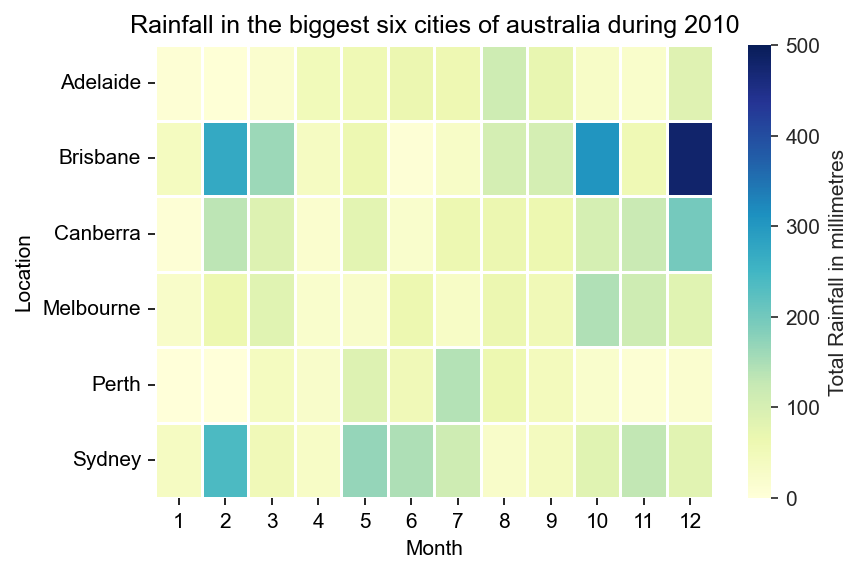

In [8]:

plt.figure(dpi=150)
plt.title("Rainfall in the biggest six cities of australia during 2010")
sns.set_style("white")
sns.heatmap(matrix, cmap='YlGnBu', vmin=0, vmax=500, linewidths=.5 , cbar_kws={'label': 'Total Rainfall in millimetres'})